In [1]:
import os
from pathlib import Path
import pandas as pd
import time

class Config:
    BASE_DIR = Path("../DATA")
    MISSIONS = ["ESA-Mission1", "ESA-Mission2", "ESA-Mission3"]
    FILE_MAP = {
        'anomalies': 'anomaly_types.csv',
        'channels': 'channels.csv',
        'labels': 'labels.csv',
        'telecommands': 'telecommands.csv',
        'events': 'events.csv'
    }

    @classmethod
    def setup_paths(cls):
        start_time = time.time()
        print("\n🔧 [CONFIG] Iniciando configuración de rutas...")
        print(f"📁 Directorio base: {cls.BASE_DIR.resolve()}")
        print(f"🛰 Misiones disponibles: {', '.join(cls.MISSIONS)}")

        if not cls.BASE_DIR.exists():
            print("❌ [ERROR] El directorio base no existe.")
            return False

        print(f"✅ [CONFIG] Rutas configuradas correctamente en {time.time() - start_time:.2f} segundos.\n")
        return True


In [2]:
import os
print("📁 Directorio actual:", os.getcwd())
print("📂 Archivos en este directorio:", os.listdir())
print("📂 Archivos en ../ :", os.listdir("../"))
print("📂 Archivos en ../src :", os.listdir("../src"))




📁 Directorio actual: c:\Users\JMGY-\Documents\satellite-anomaly-detector-ESA\NOTEBOOK
📂 Archivos en este directorio: ['.ipynb_checkpoints', '.jupyter', '01_EDA.ipynb', '02_review_Advance_Anomalias.ipynb', '03_Model_Training.ipynb', '04_Events _vs_Comand.ipynb', '05_Interpretabilidad_SHAP.ipynb', '06_Proyeccion_anomalias_por_Mision.ipynb', 'artifacts', 'benchmark_modelos.png', 'data', 'figures', 'label_encoder_y.joblib', 'models', 'reports', 'shap_class_0.png', 'shap_class_1.png', 'shap_class_10.png', 'shap_class_11.png', 'shap_class_12.png', 'shap_class_13.png', 'shap_class_14.png', 'shap_class_15.png', 'shap_class_16.png', 'shap_class_17.png', 'shap_class_18.png', 'shap_class_19.png', 'shap_class_2.png', 'shap_class_20.png', 'shap_class_21.png', 'shap_class_22.png', 'shap_class_23.png', 'shap_class_24.png', 'shap_class_25.png', 'shap_class_26.png', 'shap_class_27.png', 'shap_class_28.png', 'shap_class_29.png', 'shap_class_3.png', 'shap_class_30.png', 'shap_class_31.png', 'shap_class_3

In [3]:
import sys
sys.path.append("../src")  # Agregamos la carpeta src al path

from config import Config

# Validamos que las rutas estén bien
Config.setup_paths()




🔧 [CONFIG] Iniciando configuración de rutas...
📁 Directorio base: C:\Users\JMGY-\Documents\satellite-anomaly-detector-ESA\DATA
🛰 Misiones disponibles: ESA-Mission1, ESA-Mission2, ESA-Mission3
✅ [CONFIG] Rutas configuradas correctamente en 0.00 segundos.



True

In [4]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import time
import traceback

class Config:
    BASE_DIR = Path("../DATA")
    MISSIONS = ["ESA-Mission1", "ESA-Mission2", "ESA-Mission3"]
    FILE_MAP = {
        'anomalies': 'anomaly_types.csv',
        'channels': 'channels.csv',
        'labels': 'labels.csv',
        'telecommands': 'telecommands.csv',
        'events': 'events.csv'
    }
    
    @classmethod
    def setup_paths(cls):
        start_time = time.time()
        print("\n🔧 [CONFIG] Iniciando configuración de rutas...")
        print(f"📁 Directorio base: {cls.BASE_DIR.resolve()}")
        print(f"🛰 Misiones disponibles: {', '.join(cls.MISSIONS)}")

        if not cls.BASE_DIR.exists():
            print("❌ [ERROR] El directorio base no existe. Verifica la ruta.")
            return False

        print(f"✅ [CONFIG] Rutas configuradas correctamente en {time.time() - start_time:.2f} segundos.\n")
        return True

class DataLoader:
    def __init__(self):
        self.mission_data = {}

    def _load_single_file(self, mission_path: Path, filename: str):
        try:
            file_path = mission_path / filename
            if file_path.exists():
                df = pd.read_csv(file_path, low_memory=False)
                return df
            print(f"   ⚠️ Archivo no encontrado: {filename}")
            return None
        except Exception as e:
            print(f"❌ Error cargando {filename}: {str(e)}")
            traceback.print_exc()
            return None

    def load_mission(self, mission_name: str):
        start = time.time()
        mission_path = Config.BASE_DIR / mission_name / mission_name
        if not mission_path.exists():
            raise FileNotFoundError(f"❌ Directorio no encontrado: {mission_path}")
        
        mission_dict = {}
        print(f"\n📦 [MISIÓN] Cargando datos de: {mission_name}")

        for data_type, filename in tqdm(Config.FILE_MAP.items(), desc=f"Cargando archivos de {mission_name}"):
            df = self._load_single_file(mission_path, filename)
            if df is not None:
                mission_dict[data_type] = df
                print(f"   ✅ {filename:<20} → {df.shape[0]:>7,} filas")

        elapsed = time.time() - start
        print(f"⏱️  Tiempo de carga para {mission_name}: {elapsed:.2f} segundos")
        return mission_dict

    def load_all_missions(self):
        global_start = time.time()
        print("\n" + "="*60)
        print("🚀 INICIANDO CARGA DE DATOS DE TODAS LAS MISIONES")
        print("="*60)
        
        for mission in tqdm(Config.MISSIONS, desc="🛰 Procesando misiones"):
            try:
                self.mission_data[mission] = self.load_mission(mission)
            except Exception as e:
                print(f"\n❌ Error en misión {mission}: {str(e)}")
                traceback.print_exc()
        
        total_elapsed = time.time() - global_start
        print("\n✅ Todas las misiones cargadas.")
        print(f"⏱️  Tiempo total: {total_elapsed:.2f} segundos\n")
        return self.mission_data


# Código para ejecutar y probar la carga:
if __name__ == "__main__":
    Config.setup_paths()
    loader = DataLoader()
    data = loader.load_all_missions()

    print("\n📊 Resumen de datos cargados:")
    for mission, datasets in data.items():
        print(f" - {mission}:")
        for key, df in datasets.items():
            print(f"    {key}: {df.shape[0]} filas, {df.shape[1]} columnas")



🔧 [CONFIG] Iniciando configuración de rutas...
📁 Directorio base: C:\Users\JMGY-\Documents\satellite-anomaly-detector-ESA\DATA
🛰 Misiones disponibles: ESA-Mission1, ESA-Mission2, ESA-Mission3
✅ [CONFIG] Rutas configuradas correctamente en 0.00 segundos.


🚀 INICIANDO CARGA DE DATOS DE TODAS LAS MISIONES


🛰 Procesando misiones:   0%|          | 0/3 [00:00<?, ?it/s]


📦 [MISIÓN] Cargando datos de: ESA-Mission1


Cargando archivos de ESA-Mission1: 100%|██████████| 5/5 [00:00<00:00, 159.17it/s]


   ✅ anomaly_types.csv    →     200 filas
   ✅ channels.csv         →      76 filas
   ✅ labels.csv           →   3,589 filas
   ✅ telecommands.csv     →     698 filas
   ⚠️ Archivo no encontrado: events.csv
⏱️  Tiempo de carga para ESA-Mission1: 0.04 segundos

📦 [MISIÓN] Cargando datos de: ESA-Mission2


Cargando archivos de ESA-Mission2: 100%|██████████| 5/5 [00:00<00:00, 158.52it/s]

   ✅ anomaly_types.csv    →     644 filas
   ✅ channels.csv         →     100 filas
   ✅ labels.csv           →  11,167 filas
   ✅ telecommands.csv     →     123 filas
   ✅ events.csv           →     604 filas
⏱️  Tiempo de carga para ESA-Mission2: 0.04 segundos



📦 [MISIÓN] Cargando datos de: ESA-Mission3


Cargando archivos de ESA-Mission3: 100%|██████████| 5/5 [00:00<00:00, 258.27it/s]

   ✅ anomaly_types.csv    →     586 filas
   ✅ channels.csv         →      48 filas
   ✅ labels.csv           →   2,586 filas
   ⚠️ Archivo no encontrado: telecommands.csv
   ⚠️ Archivo no encontrado: events.csv
⏱️  Tiempo de carga para ESA-Mission3: 0.02 segundos



🛰 Procesando misiones: 100%|██████████| 3/3 [00:00<00:00, 31.07it/s]


✅ Todas las misiones cargadas.
⏱️  Tiempo total: 0.11 segundos


📊 Resumen de datos cargados:
 - ESA-Mission1:
    anomalies: 200 filas, 7 columnas
    channels: 76 filas, 5 columnas
    labels: 3589 filas, 4 columnas
    telecommands: 698 filas, 2 columnas
 - ESA-Mission2:
    anomalies: 644 filas, 7 columnas
    channels: 100 filas, 5 columnas
    labels: 11167 filas, 4 columnas
    telecommands: 123 filas, 2 columnas
    events: 604 filas, 3 columnas
 - ESA-Mission3:
    anomalies: 586 filas, 7 columnas
    channels: 48 filas, 5 columnas
    labels: 2586 filas, 4 columnas


In [5]:
import sys
print(sys.executable)

C:\Users\JMGY-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [ ]:
import pandas as pd
import os

# Crear carpeta si no existe
os.makedirs("data", exist_ok=True)

# Crear datos simulados (revisá si estas columnas coinciden con tus features)
df_nuevos = pd.DataFrame([
    {"Dimensionality": 1, "Length": 25, "Category": 2, "Locality": 1, "Subclass": 0, "mission": "mission_1"},
    {"Dimensionality": 2, "Length": 12, "Category": 1, "Locality": 3, "Subclass": 1, "mission": "mission_2"}
])

# Guardar CSV
df_nuevos.to_csv("data/nuevos_eventos.csv", index=False)
print("✅ Archivo de prueba creado en data/nuevos_eventos.csv")

✅ Archivo de prueba creado en data/nuevos_eventos.csv


In [ ]:
from sklearn.model_selection import cross_val_score

# Por ejemplo con Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ejecutamos validación cruzada de 5 particiones con F1-macro
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

print(f"F1 Macro promedio (CV=5): {scores.mean():.3f} ± {scores.std():.3f}")

F1 Macro promedio (CV=5): 0.072 ± 0.007


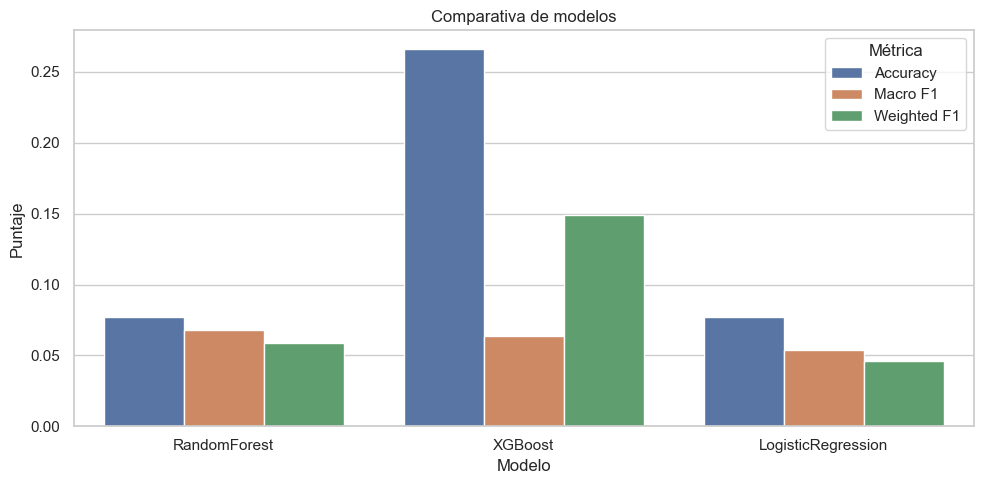

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
df_resultados_melted = df_resultados.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10,5))
sns.barplot(data=df_resultados_melted, x='Modelo', y='Valor', hue='Métrica')
plt.title("Comparativa de modelos")
plt.ylabel("Puntaje")
plt.tight_layout()
plt.savefig("benchmark_modelos.png")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Definimos el modelo base
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Espacio de hiperparámetros a explorar
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda aleatoria
busqueda = RandomizedSearchCV(
    estimator=modelo_rf,
    param_distributions=param_dist,
    n_iter=20,  # cuántas combinaciones probar
    cv=5,
    scoring=make_scorer(f1_score, average='macro'),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenamos
busqueda.fit(X_train, y_train)

# Resultados
print(f"\n✅ Mejor combinación encontrada:")
print(busqueda.best_params_)

print("\n🎯 Macro F1 de validación cruzada:")
print(busqueda.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Mejor combinación encontrada:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

🎯 Macro F1 de validación cruzada:
0.06378643681296572


In [ ]:
import joblib
joblib.dump(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train, y_train), "modelo_ganador_xgb.joblib")
print("✅ Modelo XGBoost guardado como modelo_ganador_xgb.joblib")

✅ Modelo XGBoost guardado como modelo_ganador_xgb.joblib
